In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 22.9 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=0649b7a543cf4cdea92e65e6750bd1e8e2fd5b9172f4f23cfc78a5c73b9ff58e
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.8 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=acd48c7bea83e746f30910f1c45f8756f241b9e72b55b6e37fcde93d0863ed81
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=e55afecfafc853a7c2e4260b469f7527e048e605419b33

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 74.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.1 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup

# import modules for web scrapping
import requests
from bs4 import BeautifulSoup

In [45]:
book = "Jawaharlal_Nehru_a_Biography"
startdate = 1700
enddate = 2020

In [46]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [47]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [48]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

22
1/chapter1
1/chapter2
1/chapter3
1/chapter4
1/chapter5
1/chapter6
1/chapter7
1/chapter8
1/chapter9
1/chapter10
1/chapter11
1/chapter12
1/chapter13
1/chapter14
1/chapter15
1/chapter16
1/chapter17
1/chapter18
1/chapter19
1/chapter20
1/chapter21
1/chapter22


In [49]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [50]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


In [51]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'nabha jail', 'indepen dence', 'motilal nehru', 'gandhi smarak sangrahalaya', 'presidential address', 'Congressmen and non-Congressmen', 'boundary commissions', 'kisan conference', 'motilal nehru papers', 'return jawaharlal', 'Cabinet Mission', 'nabha administration', 'Five-Year and Ten-Year', 'political agitation', 'legal practice', 'Interim Government', 'badminton and volley-ball', 'Cabinet Mission Plan', 'jawaharlaj', 'tax', 'congress presidency', 'discouraged and depressed', 'Government', 'nut the cracker', 'agrarian crisis', 'mao', 'Home Dept', 'asfor pandit jawaharlal', 'British Government', 'external affairs', 'occupancy tenants', 'tutional and legal', 'accept', 'interim government', 'Administrator Nabha', 'cottage industries', 'untrue or exaggerated', 'tomadame chiang kai', 'exploitation', 'satyagraha', 'deathof kamaia nehru', 'Unchahar to call', 'India', 'facts aboutkamels nehru', 'Gandhi', 'political conference', 'continue', 'defence treaty', 'indian history congress', 'Alla

In [52]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Talukdars_And_Links_1912': ['1/chapter1'], 'Forthematterofthat_Agrownupperson_1912': ['1/chapter1'], 'Agrownupperson_Beingendowedwith_1912': ['1/chapter1'], 'Motilal_Nehru_1912': ['1/chapter1'], 'Motilal_Nehru_1917': ['1/chapter2'], 'Motilal_Nehru_1930': ['1/chapter10'], 'Public_School_1912': ['1/chapter1'], 'Autobiography_Jawaharlal_1912': ['1/chapter1'], 'Prison_In_The’Thirties_1912': ['1/chapter1'], 'Poetry_And_Literature_1912': ['1/chapter1'], 'Jawaharial_Nehru_1912': ['1/chapter1'], 'Literature_And_Developed_1912': ['1/chapter1'], 'Zamindars_And_Talukdars_1912': ['1/chapter1'], 'Jawaharlal_Nehru_1923': ['1/chapter7'], 'Jawaharlal_Nehru_1929': ['1/chapter9'], 'Jawaharlal_Nehru_1936': ['1/chapter13'], 'Jawaharlal_Nehru_1947': ['1/chapter22'], 'Confined_Tohisletterstohisfather_1912': ['1/chapter1'], 'Pandit_Jawaharlal_1912': ['1/chapter1'], 'Pandit_Jawaharlal_1931': ['1/chapter11'], 'Pandit_Jawaharlal_1933': ['1/chapter12'], 'Pandit_Jawaharlal_1936': ['1

In [53]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [54]:
key_yr_chap_mp

defaultdict(list,
            {'Talukdars_And_Links_1912': ['1/chapter1'],
             'Forthematterofthat_Agrownupperson_1912': ['1/chapter1'],
             'Agrownupperson_Beingendowedwith_1912': ['1/chapter1'],
             'Motilal_Nehru_1912': ['1/chapter1'],
             'Motilal_Nehru_1917': ['1/chapter2'],
             'Motilal_Nehru_1930': ['1/chapter10'],
             'Public_School_1912': ['1/chapter1'],
             'Autobiography_Jawaharlal_1912': ['1/chapter1'],
             'Prison_In_The’Thirties_1912': ['1/chapter1'],
             'Poetry_And_Literature_1912': ['1/chapter1'],
             'Jawaharial_Nehru_1912': ['1/chapter1'],
             'Literature_And_Developed_1912': ['1/chapter1'],
             'Zamindars_And_Talukdars_1912': ['1/chapter1'],
             'Jawaharlal_Nehru_1923': ['1/chapter7'],
             'Jawaharlal_Nehru_1929': ['1/chapter9'],
             'Jawaharlal_Nehru_1936': ['1/chapter13'],
             'Jawaharlal_Nehru_1947': ['1/chapter22'],
    

In [55]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Talukdars_And_Links_1912
Forthematterofthat_Agrownupperson_1912
Agrownupperson_Beingendowedwith_1912
Motilal_Nehru_1912
Motilal_Nehru_1917
Motilal_Nehru_1930
Public_School_1912
Autobiography_Jawaharlal_1912
Prison_In_The’Thirties_1912
Poetry_And_Literature_1912
Jawaharial_Nehru_1912
Literature_And_Developed_1912
Zamindars_And_Talukdars_1912
Jawaharlal_Nehru_1923
Jawaharlal_Nehru_1929
Jawaharlal_Nehru_1936
Jawaharlal_Nehru_1947
Confined_Tohisletterstohisfather_1912
Pandit_Jawaharlal_1912
Pandit_Jawaharlal_1931
Pandit_Jawaharlal_1933
Pandit_Jawaharlal_1936
University_1912
Middle_Class_1917
Representative_Committee_1917
Jawaharlal_1917
Jawaharlal_1927
Jawaharlal_1929
Jawaharlal_1933
Tions_To_Proceed_1917
Rao_Maharajsingh_1917
Late_Twenties_1917
Motilal_Nehru_Papers_1917
Home_Rule_1917
Mrs_Besant_1917
Engagement_1917
Joint_Secretaries_1917
Pandit_Motilal_Nehru_1917
Motilal_1917
Government_1920
Government_1931
Egregiously_To_Minister_1920
Political_Agitation_1920
Legal_Practice_1920
Gandhi_

In [56]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [57]:
url = 'https://en.wikipedia.org/wiki/Mahatma_Gandhi'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Biography', 'Early_life_and_background', 'Three_years_in_London', 'Student_of_law', 'Vegetarianism_and_committee_work', 'Called_to_the_bar', 'Civil_rights_activist_in_South_Africa_(1893–1914)', 'Europeans,_Indians_and_Africans', 'Struggle_for_Indian_independence_(1915–1947)', 'Role_in_World_War_I', 'Champaran_agitations', 'Kheda_agitations', 'Khilafat_movement', 'Non-co-operation', 'Salt_Satyagraha_(Salt_March)', 'Gandhi_as_folk_hero', 'Negotiations', 'Round_Table_Conferences', 'Congress_politics', 'World_War_II_and_Quit_India_movement', 'Partition_and_independence', 'Death', 'Funeral_and_memorials', 'Principles,_practices,_and_beliefs', 'Influences', 'Leo_Tolstoy', 'Shrimad_Rajchandra', 'Religious_texts', 'Sufism', 'On_wars_and_nonviolence', 'Wars', 'Truth_and_Satyagraha', 'Nonviolence', 'On_inter-religious_relations', 'Buddhists,_Jains_and_Sikhs', 'Muslims', 'Christians', 'Jews', 'On_life,_society_and_other_application_of_his_ideas', 'Vegetarianism,_food,_and_animals', 'Fasting', '

In [58]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [59]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [60]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [61]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [62]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

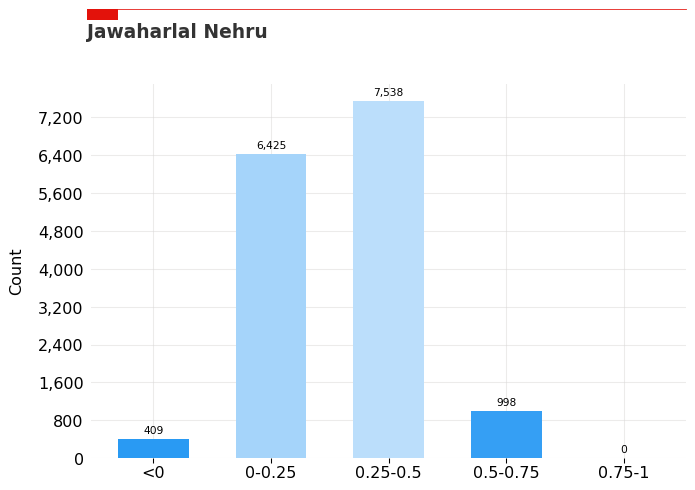

In [63]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s="Jawaharlal Nehru", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [64]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Biography': -1, 'Early_life_and_background': 1885, 'Three_years_in_London': -1, 'Student_of_law': 1888, 'Vegetarianism_and_committee_work': 1901, 'Called_to_the_bar': 1893, 'Civil_rights_activist_in_South_Africa_(1893–1914)': 1897, 'Europeans,_Indians_and_Africans': 1908, 'Struggle_for_Indian_independence_(1915–1947)': 1930, 'Role_in_World_War_I': 1916, 'Champaran_agitations': 1917, 'Kheda_agitations': 1918, 'Khilafat_movement': 1919, 'Non-co-operation': 1919, 'Salt_Satyagraha_(Salt_March)': 1928, 'Gandhi_as_folk_hero': 1905, 'Negotiations': 1931, 'Round_Table_Conferences': 1931, 'Congress_politics': 1936, 'World_War_II_and_Quit_India_movement': 1944, 'Partition_and_independence': 1947, 'Death': 1948, 'Funeral_and_memorials': 1948, 'Principles,_practices,_and_beliefs': -1, 'Influences': 1892, 'Leo_Tolstoy': 1909, 'Shrimad_Rajchandra': 1930, 'Religious_texts': 1930, 'Sufism': -1, 'On_wars_and_nonviolence': -1, 'Wars': 1918, 'Truth_and_Satyagraha': 1932, 'Nonviolence': 1943, 'On_inter-

In [65]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [66]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


248


In [67]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Early_life_and_background   ->  177
Student_of_law   ->  169
Vegetarianism_and_committee_work   ->  103
Called_to_the_bar   ->  176
Civil_rights_activist_in_South_Africa_(1893–1914)   ->  138
Europeans,_Indians_and_Africans   ->  126
Struggle_for_Indian_independence_(1915–1947)   ->  208
Role_in_World_War_I   ->  150
Champaran_agitations   ->  157
Kheda_agitations   ->  172
Khilafat_movement   ->  207
Non-co-operation   ->  196
Salt_Satyagraha_(Salt_March)   ->  231
Gandhi_as_folk_hero   ->  146
Negotiations   ->  213
Round_Table_Conferences   ->  208
Congress_politics   ->  199
World_War_II_and_Quit_India_movement   ->  186
Partition_and_independence   ->  196
Death   ->  135
Funeral_and_memorials   ->  138
Principles,_practices,_and_beliefs   ->  90
Influences   ->  104
Leo_Tolstoy   ->  107
Shrimad_Rajchandra   ->  114
Religious_texts   ->  66
Sufism   ->  63
Wars   ->  110
Truth_and_Satyagraha   ->  115
Nonviolence   ->  112
Buddhists,_Jains_and_Sikhs   ->  71
Muslims   ->  108
Chr

In [68]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [69]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Early_life_and_background  ->   ['Autobiography_Jawaharlal_1912', 'Pandit_Jawaharlal_1912', 'Joint_Secretaries_1917']
Struggle_for_Indian_independence_(1915–1947)  ->   ['Indian_History_Congress_1930', 'Civil_Disobedience_1930', 'Gandhi_1930', 'Revolutionary_Struggle_1930', 'Constitutional_Issue_1930']
Champaran_agitations  ->   ['Motilal_Nehru_Papers_1917', 'Rao_Maharajsingh_1917', 'Pandit_Motilal_Nehru_1917', 'Jawaharlal_1917', 'Motilal_Nehru_1917']
Kheda_agitations  ->   ['Kisan_Sabha_1921', 'Kisan_Sabha_Movement_1921', 'Mrs_Besant_1917', 'Kisan_Sabhas_1921', 'Village_Kisan_Sabhas_1921']
Khilafat_movement  ->   ['Political_Agitation_1920', 'Egregiously_To_Minister_1920', 'Leader_Mahatma_Gandhi_1921', 'Mr_Gandhi_1921', 'Institutions_Resignation_1920']
Non-co-operation  ->   ['Gandhi_Smarak_Sangrahalaya_1920', 'Gandhiji_1920', 'Satyagraha_1920', 'Satyagraha_Vow_1920', 'Civil_Disobedience_1921']
Salt_Satyagraha_(Salt_March)  ->   ['Jawaharlal_Nehru_1929', 'Mahatma_1927', 'Gandhi_1927',

In [70]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [71]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [72]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [73]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['Jawaharlal', 'Civil Disobedience', 'Jawaharlal Nehru', 'Pandit Jawaharlal', 'Gandhiji', 'Gandhi', 'Motilal Nehru', 'Direct Action', 'Home Dept', 'Nehru', 'Bombay Govt', 'Viceroy', 'Prepared', 'Congress']
14
{'Early_life_and_background': 0, 'Struggle_for_Indian_independence_(1915–1947)': 1, 'Champaran_agitations': 0, 'Kheda_agitations': 0, 'Khilafat_movement': 0, 'Non-co-operation': 2, 'Salt_Satyagraha_(Salt_March)': 3, 'Negotiations': 1, 'Round_Table_Conferences': 1, 'Congress_politics': 0, 'World_War_II_and_Quit_India_movement': 0, 'Partition_and_independence': 1, 'Leo_Tolstoy': 0, 'Truth_and_Satyagraha': 0, 'Muslims': 0, 'Jews': 0, 'Vegetarianism,_food,_and_animals': 0, 'Brahmacharya:_abstinence_from_sex_and_food': 1, 'Nai_Talim,_basic_education': 0, 'Gandhian_economics': 0, 'Gandhism': 0, 'Literary_works': 0, 'Followers_and_international_influence': 0, 'Global_days_that_celebrate_Gandhi': 0}


In [74]:
print(sum(list(mp2.values())))

10


In [75]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Early_life_and_background': set(), 'Struggle_for_Indian_independence_(1915–1947)': set(), 'Champaran_agitations': set(), 'Kheda_agitations': set(), 'Khilafat_movement': set(), 'Non-co-operation': set(), 'Salt_Satyagraha_(Salt_March)': {'Jawaharlal_Nehru'}, 'Negotiations': set(), 'Round_Table_Conferences': set(), 'Congress_politics': set(), 'World_War_II_and_Quit_India_movement': set(), 'Partition_and_independence': set(), 'Leo_Tolstoy': set(), 'Truth_and_Satyagraha': set(), 'Muslims': set(), 'Jews': set(), 'Vegetarianism,_food,_and_animals': set(), 'Brahmacharya:_abstinence_from_sex_and_food': set(), 'Nai_Talim,_basic_education': set(), 'Gandhian_economics': set(), 'Gandhism': set(), 'Literary_works': set(), 'Followers_and_international_influence': set(), 'Global_days_that_celebrate_Gandhi': set()}
{'Early_life_and_background': 0, 'Struggle_for_Indian_independence_(1915–1947)': 0, 'Champaran_agitations': 0, 'Kheda_agitations': 0, 'Khilafat_movement': 0, 'Non-co-operation': 0, 'Salt_S

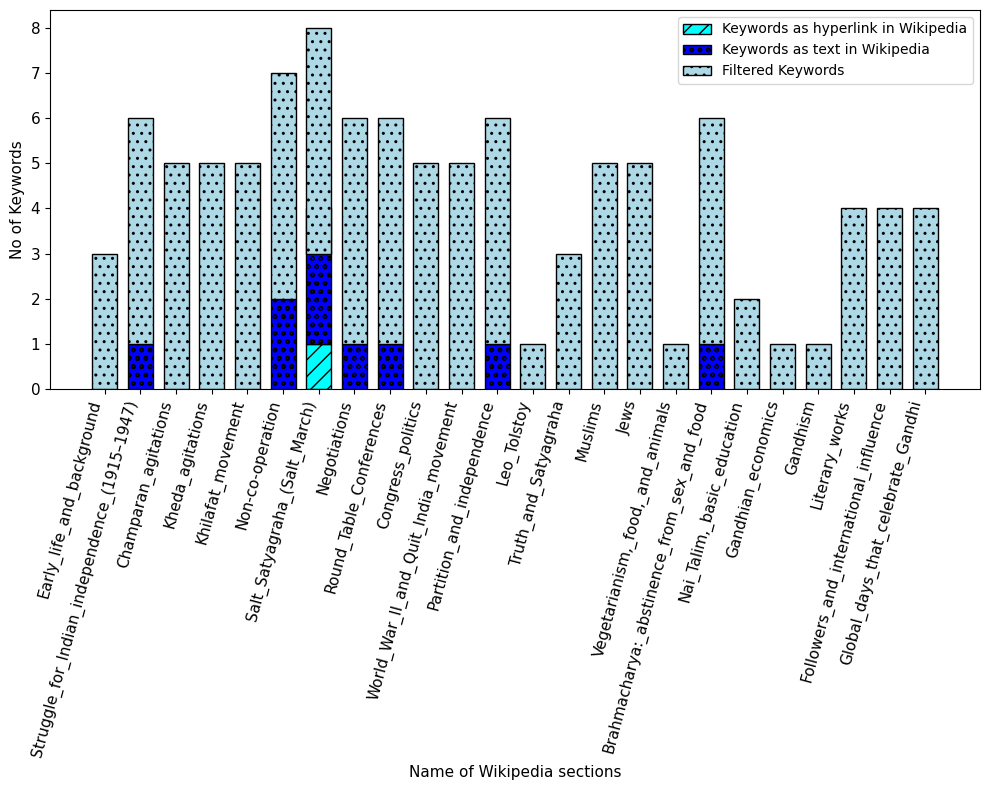

In [76]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [77]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Kisan_Sabha_Movement', 'Negotiations', 'Institutions_Resignation', 'Jtorajendra_Prasad', 'Example_Gandhi', 'Gandhiji', 'Pandit_Nehru', 'Crippswaseasily_The_Ablestof', 'Hastening_To_Wardha', 'Mr_Gandhi', 'Political_Reaction', 'Prime_Minister', 'Pandit_Jawaharlal', 'Meeting_Gandhi', 'Agrownupperson_Beingendowedwith', 'Civil_Disobedience', 'Allahabad_Municipal', 'Return_Jawaharlal', 'Pandit_Motilal_Nehru', 'Swarajist_Leaders_Motilal', 'India', 'Gandhi', 'Joint_Secretaries', 'Mahatma', 'Satyagraha_Vow', 'Kisan_Sabha', 'Allahabad_Municipality_File', 'Kisan_Sabhas', 'Village_Kisan_Sabhas', 'Allahabad_Municipal_Board', 'Jawaharlats_Interviews', 'Nehru', 'Autobiography_Jawaharlal', 'Jawaharlal', 'Jawa', 'Political_Agitation', 'Viceroyand_Churchill', 'Jawaharlat_Nehru', 'Eat_And_Sleep', 'Motilal_Nehru_Papers', 'Caste_And_Wealth', 'Satyagraha', 'Defence_Communications', 'Presidential_Address', 'Viceroyalty', 'Affairs_Defence', 'President_Jawaharlal', 'Boundary_Commissions', 'Constitutional_Iss

In [78]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

3709
{'Fruitarianism', 'White_South_Africans', 'Legume', 'Martin_Balluch', 'The_Most_Important_People_of_the_Century', 'Nagaland_Pradesh_Congress_Committee', 'Category:Articles_with_BIBSYS_identifiers', 'Azad_Hind', 'Chandra_Shekhar_Azad', 'Kerala_Pradesh_Congress_Committee', 'Bombay', 'Satyashodhak_Samaj', 'Ram_Dass', 'Whitehouse.gov', 'Philip_Glass', 'Tamil_language', 'John_Sirica', 'Help:CS1_errors#citation_missing_title', 'Category:Articles_with_BNF_identifiers', 'Womesh_Chunder_Bonnerjee', 'Sahajanand_Saraswati', 'International_Vedanta_Society', 'The_Hindu', 'Hind_Swaraj_or_Indian_Home_Rule', 'Mahatma_Gandhi_Marine_National_Park', 'Harishchandra', 'Daniel_H._Kress', 'Franklin_D._Roosevelt', 'E._F._Schumacher', 'Satya_(magazine)', 'Odisha_Pradesh_Congress_Committee', 'Political_integration_of_India', 'Gandhi_Jayanti', 'File:P_religion_world.svg', 'National_Salt_Satyagraha_Memorial', 'Robert_Owen', 'Bhavnagar_State', 'Sadharan_Brahmo_Samaj', 'Helena_Blavatsky', 'Gandhigiri', 'Arrang

In [79]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

{'Mahatma', 'Motilal_Nehru', 'Satyagraha', 'Gujarat', 'Jawaharlal_Nehru'}


5

In [80]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Revolutionary_Struggle_1930', 'Kisan_Sabha_1921', 'Jawaharlal_1917', 'Kisan_Sabhas_1921', 'Civil_Disobedience_1936', 'Jawaharlal_Nehru_1947', 'Jawaharlats_Interviews_1942', 'Pandit_Jawaharlal_1912', 'Gandhiji_1940', 'Jawaharlal_Nehru_1923', 'Mao_1940', 'Gandhi_1927', 'Civil_Disobedience_1940', 'Gandhi_Smarak_Sangrahalaya_1920', 'Pandit_Nehru_1946', 'Motilal_Nehru_1912', 'Civil_Disobedience_1929', 'Allahabad_Municipality_File_1923', 'Pandit_Jawaharlal_1933', 'Prime_Minister_1946', 'Mrs_Besant_1917', 'Nehru_1942', 'Gandhi_1931', 'Defence_Communications_1946', 'Quarrelsomeness_And_Inhumanity_1933', 'Constitutional_Issue_1930', 'Autobiography_Jawaharlal_1912', 'Viceroyand_Churchill_1942', 'Caste_And_Wealth_1929', 'Jtorajendra_Prasad_1936', 'Satyagraha_Vow_1920', 'Joint_Secretaries_1917', 'Example_Gandhi_1946', 'Misconduct_Of_Soldiers_1942', 'Presidential_Address_1936', 'Satyagraha_1920', 'Gandhi_1946', 'Political_Agitation_1920', 'Allahabad_Municipal_Board_1923', 'Jawaharlal_Nehru_1929',

In [81]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Forthematterofthat_Agrownupperson_1912': ['1/chapter1'], 'Agrownupperson_Beingendowedwith_1912': ['1/chapter1'], 'Motilal_Nehru_1912': ['1/chapter1'], 'Motilal_Nehru_1917': ['1/chapter2'], 'Autobiography_Jawaharlal_1912': ['1/chapter1'], 'Poetry_And_Literature_1912': ['1/chapter1'], 'Literature_And_Developed_1912': ['1/chapter1'], 'Jawaharlal_Nehru_1923': ['1/chapter7'], 'Jawaharlal_Nehru_1929': ['1/chapter9'], 'Jawaharlal_Nehru_1947': ['1/chapter22'], 'Pandit_Jawaharlal_1912': ['1/chapter1'], 'Pandit_Jawaharlal_1931': ['1/chapter11'], 'Pandit_Jawaharlal_1933': ['1/chapter12'], 'Jawaharlal_1917': ['1/chapter2'], 'Rao_Maharajsingh_1917': ['1/chapter2'], 'Motilal_Nehru_Papers_1917': ['1/chapter2'], 'Mrs_Besant_1917': ['1/chapter2'], 'Joint_Secretaries_1917': ['1/chapter2'], 'Pandit_Motilal_Nehru_1917': ['1/chapter2'], 'Egregiously_To_Minister_1920': ['1/chapter3'], 'Political_Agitation_1920': ['1/chapter3'], 'Gandhi_1927': ['1/chapter8'], 'Gandhi_1930': ['1/chapter10'], 'Gandhi_1931': 

In [82]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['revolutionary struggle', 'kisan sabha', 'jawaharlal', 'kisan sabhas', 'civil disobedience', 'jawaharlal nehru', 'jawaharlats interviews', 'pandit jawaharlal', 'gandhiji', 'jawaharlal nehru', 'mao', 'gandhi', 'civil disobedience', 'gandhi smarak sangrahalaya', 'pandit nehru', 'motilal nehru', 'civil disobedience', 'allahabad municipality file', 'pandit jawaharlal', 'prime minister', 'mrs besant', 'nehru', 'gandhi', 'defence communications', 'quarrelsomeness and inhumanity', 'constitutional issue', 'autobiography jawaharlal', 'viceroyand churchill', 'caste and wealth', 'jtorajendra prasad', 'satyagraha vow', 'joint secretaries', 'example gandhi', 'misconduct of soldiers', 'presidential address', 'satyagraha', 'gandhi', 'political agitation', 'allahabad municipal board', 'jawaharlal nehru', 'bombay govt', 'practice and devote', 'chiang', 'rao maharajsingh', 'mistakes and ruthlessness', 'return jawaharlal', 'poetry and literature', 'mr gandhi', 'egregiously to minister', 'crippswaseasily

In [83]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

16
94
0.1702127659574468
